In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
train_path = "/kaggle/input/big-mart-clean-1/train_clean_1.csv"

train_data = pd.read_csv(train_path)

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_data.shape

(8523, 12)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# **Univariate Analysis**

**1. Summary statistics**

In [6]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


**2. Create Frequency Table**

> One-way frequency table using pandas.crosstab() method

In [7]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
pd.crosstab(train_data['Item_Identifier'], 'Item_Identifier_freq')

col_0,Item_Identifier_freq
Item_Identifier,
DRA12,6
DRA24,7
DRA59,8
DRB01,3
DRB13,5
...,...
NCZ30,7
NCZ41,5
NCZ42,5


In [9]:
pd.crosstab(train_data['Item_Weight'], 'Item_Weight_freq')

col_0,Item_Weight_freq
Item_Weight,
4.555,4
4.590,5
4.610,7
4.615,4
4.635,5
...,...
21.000,6
21.100,17
21.200,5


In [10]:
pd.crosstab(train_data['Item_Fat_Content'], 'Item_Fat_Content_freq')

col_0,Item_Fat_Content_freq
Item_Fat_Content,
LF,316
Low Fat,5089
Regular,2889
low fat,112
reg,117


In [11]:
pd.crosstab(train_data['Item_Visibility'], 'Item_Visibility_freq')

col_0,Item_Visibility_freq
Item_Visibility,
0.000000,526
0.003575,1
0.003589,1
0.003598,1
0.003599,1
...,...
0.309390,1
0.311090,1
0.321115,1


In [12]:
pd.crosstab(train_data['Item_Type'], 'Item_Type_freq')

col_0,Item_Type_freq
Item_Type,
Baking Goods,648
Breads,251
Breakfast,110
Canned,649
Dairy,682
Frozen Foods,856
Fruits and Vegetables,1232
Hard Drinks,214
Health and Hygiene,520


In [13]:
pd.crosstab(train_data['Item_MRP'], 'Item_MRP_freq')

col_0,Item_MRP_freq
Item_MRP,
31.2900,1
31.4900,1
31.8900,1
31.9558,2
32.0558,1
...,...
266.1884,2
266.2884,1
266.5884,2


In [14]:
pd.crosstab(train_data['Outlet_Identifier'], 'Outlet_Identifier_freq')

col_0,Outlet_Identifier_freq
Outlet_Identifier,
OUT010,555
OUT013,932
OUT017,926
OUT018,928
OUT019,528
OUT027,935
OUT035,930
OUT045,929
OUT046,930


In [15]:
pd.crosstab(train_data['Outlet_Establishment_Year'], 'Outlet_Establishment_Year_freq')

col_0,Outlet_Establishment_Year_freq
Outlet_Establishment_Year,
1985,1463
1987,932
1997,930
1998,555
1999,930
2002,929
2004,930
2007,926
2009,928


In [16]:
pd.crosstab(train_data['Outlet_Size'], 'Outlet_Size_freq')

col_0,Outlet_Size_freq
Outlet_Size,
High,932
Medium,5203
Small,2388


In [17]:
pd.crosstab(train_data['Outlet_Location_Type'], 'Outlet_Location_Type_freq')

col_0,Outlet_Location_Type_freq
Outlet_Location_Type,
Tier 1,2388
Tier 2,2785
Tier 3,3350


In [18]:
pd.crosstab(train_data['Outlet_Type'], 'Outlet_Type_freq')

col_0,Outlet_Type_freq
Outlet_Type,
Grocery Store,1083
Supermarket Type1,5577
Supermarket Type2,928
Supermarket Type3,935


In [19]:
pd.crosstab(train_data['Item_Outlet_Sales'], 'Item_Outlet_Sales_freq')

col_0,Item_Outlet_Sales_freq
Item_Outlet_Sales,
33.2900,2
33.9558,1
34.6216,1
35.2874,1
36.6190,2
...,...
10306.5840,1
10993.6896,1
11445.1020,1


**3. Create Charts**

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

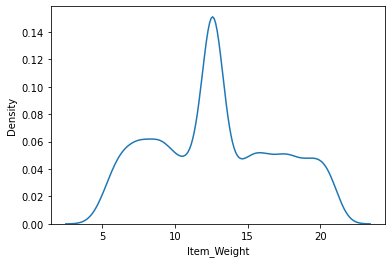

In [20]:
sns.kdeplot(train_data['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

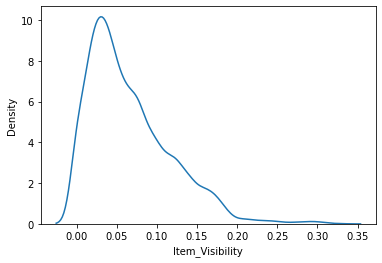

In [21]:
sns.kdeplot(train_data['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

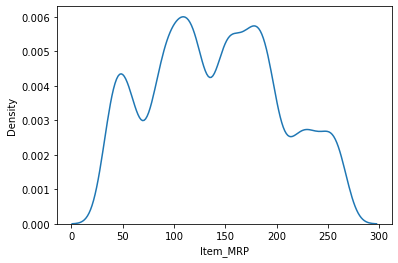

In [22]:
sns.kdeplot(train_data['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

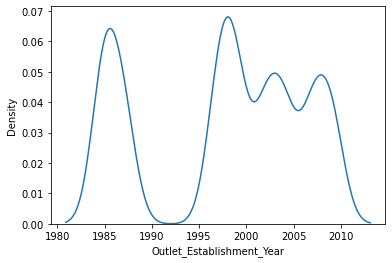

In [23]:
sns.kdeplot(train_data['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

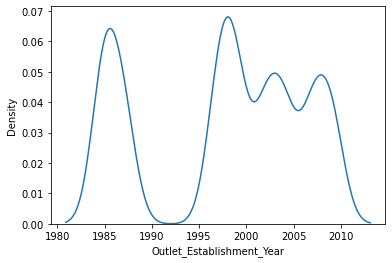

In [24]:
sns.kdeplot(train_data['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

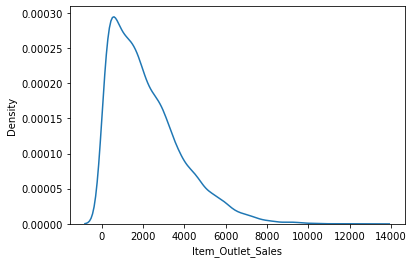

In [25]:
sns.kdeplot(train_data['Item_Outlet_Sales'])

<AxesSubplot:ylabel='Item_Outlet_Sales'>

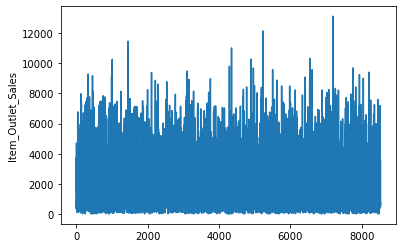

In [26]:
sns.lineplot(data= train_data['Item_Outlet_Sales'])

# **Bivariate Analysis**

**1. Scatterplots**

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

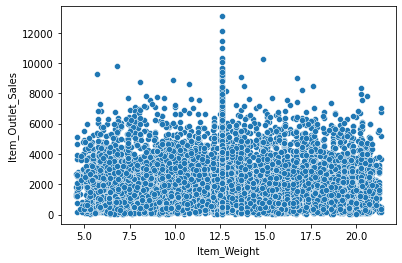

In [27]:
sns.scatterplot(x=train_data['Item_Weight'], y=train_data['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

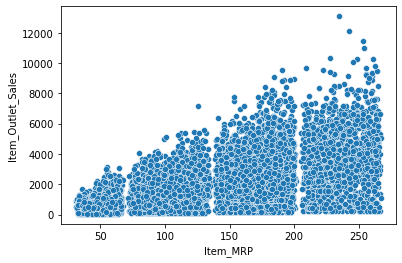

In [28]:
sns.scatterplot(x=train_data['Item_MRP'], y=train_data['Item_Outlet_Sales'])

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 83.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 85.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

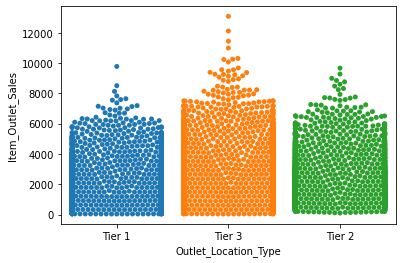

In [29]:
sns.swarmplot(x = train_data['Outlet_Location_Type'],y = train_data['Item_Outlet_Sales'])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

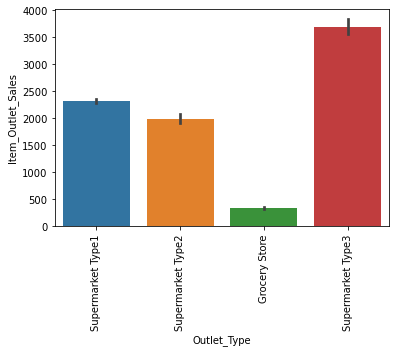

In [30]:
sns.barplot(x=train_data['Outlet_Type'], y=train_data['Item_Outlet_Sales'])
plt.xticks(rotation=90)

**2. Correlation Coefficients**

In [31]:
train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000
